In [1]:
import cv2
import pytesseract
import numpy as np
from tqdm import tqdm
from typing import Tuple
import matplotlib.pyplot as plt

In [28]:
class PreprocessData():
    def __init__(
        self, 
        data_file_name: str='data/data0.npy', 
        labels_file_name: str='data/lab0.npy'
        ) -> None:
        # Data is stored in the form of numpy arrays
        # These are interpreted as color images by cv2
        self.X = np.load(data_file_name)
        self.y = np.load(labels_file_name)

    def to_color_image(self, image: np.ndarray) -> np.ndarray:
        return cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    def to_grey_image(self, image: np.ndarray) -> np.ndarray:
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    def blur_image(self, image: np.ndarray, blur_intensity: Tuple=(3,3)) -> np.ndarray:
        return cv2.GaussianBlur(image, blur_intensity, 0) 

    def detect_edges(self, image: np.ndarray, blur_intensity: Tuple=(3,3)) -> np.ndarray:
        # Convert to graycsale
        img_gray = self.to_grey_image(image)
        # Blur the image for better edge detection
        img_blur = self.blur_image(img_gray, blur_intensity)
        
        # Sobel Edge Detection
        sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
        sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
        sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
        
        # Canny Edge Detection
        edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
        return edges
    
    def find_contours(self, image: np.ndarray, edges: np.ndarray, algo: int=cv2.CHAIN_APPROX_NONE) -> Tuple[Tuple[np.ndarray], np.ndarray, np.ndarray]:
        img_copy = image.copy()
        contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, algo)
        cv2.drawContours(image=img_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
        return contours, hierarchy, img_copy

In [29]:
MDR = PreprocessData()

100%|██████████| 10000/10000 [00:04<00:00, 2037.85it/s]


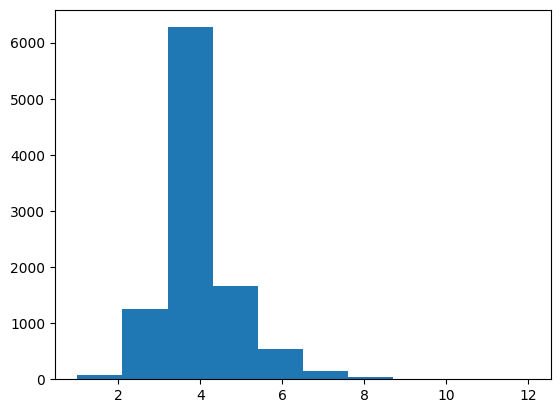

In [30]:
contour_lens = []
for x in tqdm(MDR.X):
    edges = MDR.detect_edges(MDR.to_color_image(x))
    contours, _, _ = MDR.find_contours(MDR.to_color_image(x), edges, cv2.CHAIN_APPROX_SIMPLE)
    contour_lens.append(len(contours))
contour_lens = np.array(contour_lens)
n, bins, patches = plt.hist(contour_lens)
plt.show()

In [31]:
np.where(contour_lens>11)[0]

array([8122])

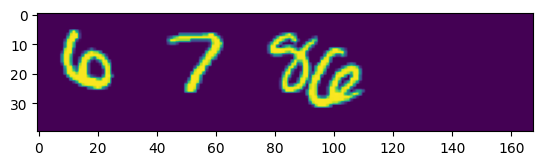

In [48]:
idx = np.where(contour_lens>9)[0][0]
plt.imshow(MDR.X[idx])

In [49]:
edges = MDR.detect_edges(MDR.to_color_image(MDR.X[idx]), (9,9))
contours, _, img_copy = MDR.find_contours(MDR.to_color_image(MDR.X[idx]), edges, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

4

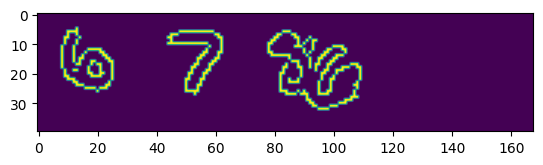

In [50]:
plt.imshow(edges)

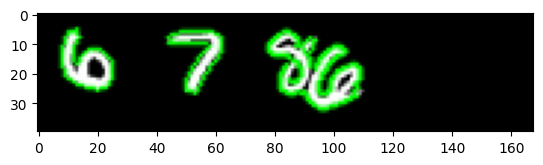

In [51]:
plt.imshow(img_copy)

In [ ]:
X = np.load('data/data0.npy')
y = np.load('data/lab0.npy')

In [ ]:
X.shape, y.shape

In [ ]:
plt.imshow(X[np.random.randint(0, X.shape[0])])

In [ ]:
image = cv2.cvtColor(X[0], cv2.COLOR_GRAY2BGR)
image.shape

In [ ]:
plt.imshow(image)

In [ ]:
# Convert to graycsale
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
 
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection

In [ ]:
plt.imshow(edges)

In [ ]:
img_copy = image.copy()
# contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image=img_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
len(contours)

In [ ]:
plt.imshow(img_copy)

In [ ]:
type(hierarchy)